# Pretrage nad lavirintom

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import lavirint
from lavirint import Lavirint
from lavirint import LavirintEditor
from lavirint import LavirintAnimacija


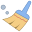
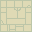
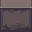
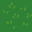
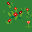
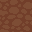
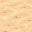
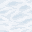
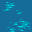
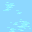
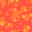
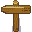
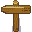
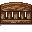
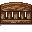
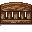
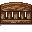
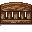
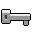
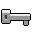
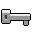
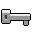
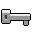
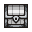
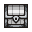
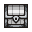
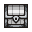
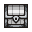
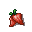
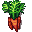

In [2]:
editor = LavirintEditor("slike")
editor.otvori_novi(sirina=20, visina=20)


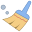
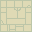
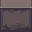
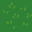
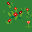
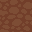
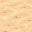
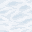
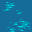
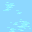
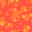
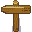
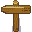
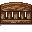
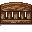
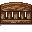
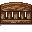
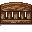
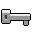
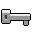
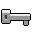
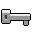
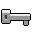
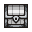
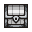
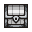
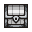
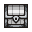
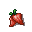
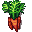

In [3]:
editor.ucitaj_postojeci("lavirinti/lavirint_1.json")

## Zadatak 1

Učitati lavirint.

In [4]:
lavirint = Lavirint("lavirinti/lavirint_1.json")

## Zadatak 2

Definisati klasu stanje koja opisuje jedno stanje u grafu pretrage.

In [5]:
class Stanje:
    def __init__(self, roditelj, x, y, polje, cena=0):
        self.roditelj = roditelj
        self.x = x
        self.y = y
        self.cena = cena
        self.polje = polje
        
    def to_dict(self, rekurzivno=False):
        stanje = {
            "x": self.x,
            "y": self.y,
            "cena": self.cena,
            "polje": self.polje,
            "prethodno": None,
        }
        
        if rekurzivno and self.roditelj is not None:
            stanje["prethodno"] = self.roditelj.to_dict(rekurzivno)
        elif self.roditelj is not None:
            stanje["prethodno"] = self.roditelj.to_dict()
        return stanje
    
    def __eq__(self, other):
        return hash(self) == hash(other)
    
    def __hash__(self):
        return hash((self.x, self.y))
    
    def __repr__(self):
        return f"X: {self.x} Y: {self.y} Polje: {self.polje} Cena: {self.cena}"

## Zadatak 3

Definisati početni čvor.

In [6]:
pocetni = random.choice(lavirint.dobavi_sa_objektom("pocetak"))
pocetno_stanje = Stanje(None, pocetni[0], pocetni[1], lavirint.dobavi_polje(pocetni[0], pocetni[1]), 0)
print(pocetno_stanje)

X: 9 Y: 10 Polje: {'podloga': 'pod', 'objekat': 'pocetak'} Cena: 0


## Zadatak 4

Definisati funkciju za dobavljanje narednih stanja.

In [7]:
def sledeca_stanja(stanje, lavirint, neprodhodna_polja):
    nova_stanja = []
    neprohodno = set(neprodhodna_polja)
    
    if stanje.x-1 >= 0 and lavirint.dobavi_polje(stanje.x-1, stanje.y)["podloga"] not in neprohodno and lavirint.dobavi_polje(stanje.x-1, stanje.y)["objekat"] not in neprohodno:
        podloga = lavirint.dobavi_polje(stanje.x-1, stanje.y)["podloga"]
        nova_stanja.append(Stanje(stanje, stanje.x-1, stanje.y, lavirint.dobavi_polje(stanje.x-1, stanje.y)))
    
    if stanje.x+1 < lavirint.sirina and lavirint.dobavi_polje(stanje.x+1, stanje.y)["podloga"] not in neprohodno and lavirint.dobavi_polje(stanje.x+1, stanje.y)["objekat"] not in neprohodno:
        podloga = lavirint.dobavi_polje(stanje.x+1, stanje.y)["podloga"]
        nova_stanja.append(Stanje(stanje, stanje.x+1, stanje.y, lavirint.dobavi_polje(stanje.x+1, stanje.y)))
    
    if stanje.y-1 >= 0 and lavirint.dobavi_polje(stanje.x, stanje.y-1)["podloga"] not in neprohodno and lavirint.dobavi_polje(stanje.x, stanje.y-1)["objekat"] not in neprohodno:
        podloga = lavirint.dobavi_polje(stanje.x, stanje.y-1)["podloga"]
        nova_stanja.append(Stanje(stanje, stanje.x, stanje.y-1, lavirint.dobavi_polje(stanje.x, stanje.y-1)))
    
    if stanje.y+1 < lavirint.visina and lavirint.dobavi_polje(stanje.x, stanje.y+1)["podloga"] not in neprohodno and lavirint.dobavi_polje(stanje.x, stanje.y+1)["objekat"] not in neprohodno:
        podloga = lavirint.dobavi_polje(stanje.x, stanje.y+1)["podloga"]
        nova_stanja.append(Stanje(stanje, stanje.x, stanje.y+1, lavirint.dobavi_polje(stanje.x, stanje.y+1)))
    
    return nova_stanja

## Zadatak 5

Implementirati i testirati algoritme:

1. Prvi u dubinu
2. Prvi u širinu
3. Dajkstrin algoritam
4. Algoritam A*


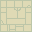
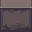
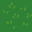
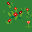
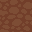
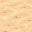
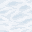
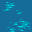
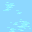
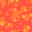
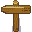
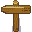
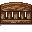
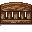
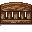
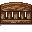
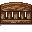
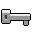
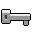
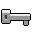
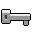
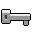
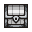
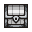
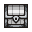
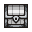
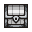
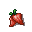
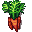

In [8]:
neprohodna_polja = {"zid"}

def dfs(lavirint, pocetno_stanje, cilj):
    za_obradu = [pocetno_stanje]
    ostale_putanje = []
    obradjeni = set()
    while len(za_obradu) > 0:
        trenutno_stanje = za_obradu.pop(0)
        ostale_putanje.append(trenutno_stanje)
        if trenutno_stanje.polje["objekat"] == cilj:
            return (trenutno_stanje, ostale_putanje)
        for dete in sledeca_stanja(trenutno_stanje, lavirint, neprohodna_polja):
            if dete not in obradjeni:
                za_obradu.insert(0, dete)
        obradjeni.add(trenutno_stanje)
    return (pocetno_stanje, ostale_putanje)

rezultat = dfs(lavirint, pocetno_stanje, "cilj")
animacija = LavirintAnimacija("slike", "lavirinti/lavirint_1.json", rezultat)
animacija.prikazi()


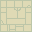
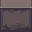
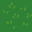
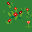
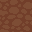
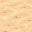
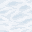
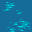
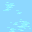
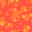
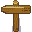
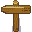
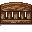
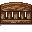
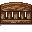
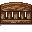
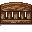
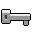
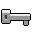
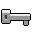
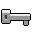
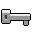
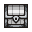
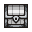
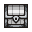
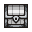
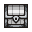
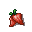
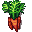

In [9]:
def bfs(lavirint, pocetno_stanje, cilj):
    za_obradu = [pocetno_stanje]
    ostale_putanje = []
    obradjeni = set([pocetno_stanje])
    while len(za_obradu) > 0:
        trenutno_stanje = za_obradu.pop(0)
        ostale_putanje.append(trenutno_stanje)
        # print(ostale_putanje)
        if trenutno_stanje.polje["objekat"] == cilj:
            return (trenutno_stanje, ostale_putanje)
        for dete in sledeca_stanja(trenutno_stanje, lavirint, neprohodna_polja):
            if dete not in obradjeni:
                za_obradu.append(dete)
                obradjeni.add(dete)
                
    return (pocetno_stanje, ostale_putanje)

rezultat = bfs(lavirint, pocetno_stanje, "cilj")
animacija = LavirintAnimacija("slike", "lavirinti/lavirint_1.json", rezultat)
animacija.prikazi()

In [10]:
def sledeca_stanja_ucs(stanje, lavirint, neprodhodna_polja, cene):
    nova_stanja = []
    neprohodno = set(neprodhodna_polja)
    
    if stanje.x-1 >= 0 and lavirint.dobavi_polje(stanje.x-1, stanje.y)["podloga"] not in neprohodno and lavirint.dobavi_polje(stanje.x-1, stanje.y)["objekat"] not in neprohodno:
        podloga = lavirint.dobavi_polje(stanje.x-1, stanje.y)["podloga"]
        nova_stanja.append(Stanje(stanje, stanje.x-1, stanje.y, lavirint.dobavi_polje(stanje.x-1, stanje.y), stanje.cena + cene.get(podloga, 0)))
    
    if stanje.x+1 < lavirint.sirina and lavirint.dobavi_polje(stanje.x+1, stanje.y)["podloga"] not in neprohodno and lavirint.dobavi_polje(stanje.x+1, stanje.y)["objekat"] not in neprohodno:
        podloga = lavirint.dobavi_polje(stanje.x+1, stanje.y)["podloga"]
        nova_stanja.append(Stanje(stanje, stanje.x+1, stanje.y, lavirint.dobavi_polje(stanje.x+1, stanje.y), stanje.cena + cene.get(podloga, 0)))
    
    if stanje.y-1 >= 0 and lavirint.dobavi_polje(stanje.x, stanje.y-1)["podloga"] not in neprohodno and lavirint.dobavi_polje(stanje.x, stanje.y-1)["objekat"] not in neprohodno:
        podloga = lavirint.dobavi_polje(stanje.x, stanje.y-1)["podloga"]
        nova_stanja.append(Stanje(stanje, stanje.x, stanje.y-1, lavirint.dobavi_polje(stanje.x, stanje.y-1), stanje.cena + cene.get(podloga, 0)))
    
    if stanje.y+1 < lavirint.visina and lavirint.dobavi_polje(stanje.x, stanje.y+1)["podloga"] not in neprohodno and lavirint.dobavi_polje(stanje.x, stanje.y+1)["objekat"] not in neprohodno:
        podloga = lavirint.dobavi_polje(stanje.x, stanje.y+1)["podloga"]
        nova_stanja.append(Stanje(stanje, stanje.x, stanje.y+1, lavirint.dobavi_polje(stanje.x, stanje.y+1), stanje.cena + cene.get(podloga, 0)))
    
    return nova_stanja


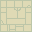
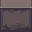
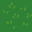
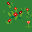
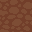
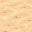
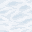
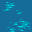
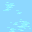
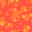
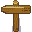
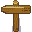
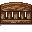
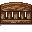
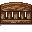
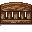
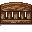
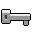
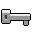
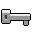
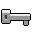
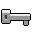
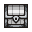
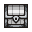
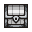
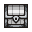
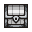
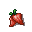
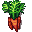

In [11]:
def ucs(lavirint, pocetno_stanje, cilj):
    cene = {
        "pod": 1,
        "led": 10,
    }
    za_obradu = [pocetno_stanje]
    ostale_putanje = []
    obradjeni = {pocetno_stanje: 0}
    while len(za_obradu) > 0:
        za_obradu = sorted(za_obradu, key=lambda x: x.cena)
        trenutno_stanje = za_obradu.pop(0)
        ostale_putanje.append(trenutno_stanje)
        if trenutno_stanje.polje["objekat"] == cilj:
            return (trenutno_stanje, ostale_putanje)
        for dete in sledeca_stanja_ucs(trenutno_stanje, lavirint, neprohodna_polja, cene):
            if dete not in obradjeni or obradjeni[dete] > dete.cena:
                if dete in za_obradu:
                    za_obradu.remove(dete)
                za_obradu.append(dete)
                obradjeni[dete] = dete.cena
    return (pocetno_stanje, ostale_putanje)

lavirint_ucs = Lavirint("lavirinti/lavirint_3.json")
rezultat = ucs(lavirint_ucs, pocetno_stanje, "cilj")
animacija = LavirintAnimacija("slike", "lavirinti/lavirint_3.json", rezultat)
animacija.prikazi()

In [12]:
def h(lavirint, stanje_x, stanje_y):
    ciljevi = lavirint.dobavi_sa_objektom("cilj")
    return min(map(lambda c: (c[0]-stanje_x)**2 + (c[1]-stanje_y)**2, ciljevi))/10

In [13]:
def sledeca_stanja_a_zvezda(stanje, lavirint, neprodhodna_polja, cene):
    nova_stanja = []
    neprohodno = set(neprodhodna_polja)
    
    if stanje.x-1 >= 0 and lavirint.dobavi_polje(stanje.x-1, stanje.y)["podloga"] not in neprohodno and lavirint.dobavi_polje(stanje.x-1, stanje.y)["objekat"] not in neprohodno:
        podloga = lavirint.dobavi_polje(stanje.x-1, stanje.y)["podloga"]
        nova_stanja.append(Stanje(stanje, stanje.x-1, stanje.y, lavirint.dobavi_polje(stanje.x-1, stanje.y), stanje.cena + cene.get(podloga, 0)))
    
    if stanje.x+1 < lavirint.sirina and lavirint.dobavi_polje(stanje.x+1, stanje.y)["podloga"] not in neprohodno and lavirint.dobavi_polje(stanje.x+1, stanje.y)["objekat"] not in neprohodno:
        podloga = lavirint.dobavi_polje(stanje.x+1, stanje.y)["podloga"]
        nova_stanja.append(Stanje(stanje, stanje.x+1, stanje.y, lavirint.dobavi_polje(stanje.x+1, stanje.y), stanje.cena + cene.get(podloga, 0)))
    
    if stanje.y-1 >= 0 and lavirint.dobavi_polje(stanje.x, stanje.y-1)["podloga"] not in neprohodno and lavirint.dobavi_polje(stanje.x, stanje.y-1)["objekat"] not in neprohodno:
        podloga = lavirint.dobavi_polje(stanje.x, stanje.y-1)["podloga"]
        nova_stanja.append(Stanje(stanje, stanje.x, stanje.y-1, lavirint.dobavi_polje(stanje.x, stanje.y-1), stanje.cena + cene.get(podloga, 0)))
    
    if stanje.y+1 < lavirint.visina and lavirint.dobavi_polje(stanje.x, stanje.y+1)["podloga"] not in neprohodno and lavirint.dobavi_polje(stanje.x, stanje.y+1)["objekat"] not in neprohodno:
        podloga = lavirint.dobavi_polje(stanje.x, stanje.y+1)["podloga"]
        nova_stanja.append(Stanje(stanje, stanje.x, stanje.y+1, lavirint.dobavi_polje(stanje.x, stanje.y+1), stanje.cena + cene.get(podloga, 0)))
    
    return nova_stanja


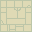
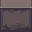
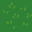
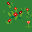
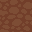
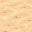
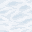
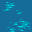
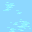
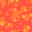
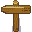
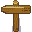
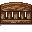
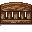
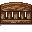
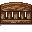
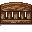
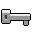
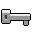
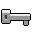
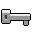
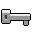
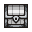
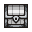
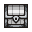
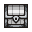
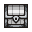
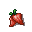
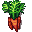

In [14]:
def a_zvezda(lavirint, pocetno_stanje, cilj):
    cene = {
        "pod": 1,
        "led": 10
    }
    za_obradu = [pocetno_stanje]
    ostale_putanje = []
    obradjeni = {pocetno_stanje: 0}
    while len(za_obradu) > 0:
        za_obradu = sorted(za_obradu, key=lambda s: s.cena + h(lavirint, s.x, s.y))
        trenutno_stanje = za_obradu.pop(0)
        ostale_putanje.append(trenutno_stanje)
        if trenutno_stanje.polje["objekat"] == cilj:
            return (trenutno_stanje, ostale_putanje)
        for dete in sledeca_stanja_a_zvezda(trenutno_stanje, lavirint, neprohodna_polja, cene):
            if dete not in obradjeni or obradjeni[dete] > dete.cena:
                if dete in za_obradu:
                    za_obradu.remove(dete)
                za_obradu.append(dete)
                obradjeni[dete] = dete.cena
                
    return (pocetno_stanje, ostale_putanje)

lavirint = Lavirint("lavirinti/lavirint_3.json")
rezultat = a_zvezda(lavirint, pocetno_stanje, "cilj")
animacija = LavirintAnimacija("slike", "lavirinti/lavirint_3.json", rezultat)
animacija.prikazi()